In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
train_data = pd.read_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Heart disease prediction\train_values.csv')
train_labels = pd.read_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Heart disease prediction\train_labels.csv')
test_data = pd.read_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Heart disease prediction\test_values.csv')

In [3]:
print(train_data.shape)
train_data.head(5)

(180, 14)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
print(train_labels.shape)
train_labels.head(5)

(180, 2)


,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [5]:
print(test_data.shape)
test_data.head(5)

(90, 14)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


#### Analysing the 'train_data' dataset

In [6]:
# Renaming the columns
train_data.columns = ["patient_id", "slope", "thal", "rbs", "chest_pain", "vessels", "fasting_blood_sugar", "resting_ekg", 
                      "cholesterol", "depression", "sex", "age", "heart_rate", "angina"]

print(train_data.shape)
train_data.head(5)

(180, 14)


,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           180 non-null    object 
 1   slope                180 non-null    int64  
 2   thal                 180 non-null    object 
 3   rbs                  180 non-null    int64  
 4   chest_pain           180 non-null    int64  
 5   vessels              180 non-null    int64  
 6   fasting_blood_sugar  180 non-null    int64  
 7   resting_ekg          180 non-null    int64  
 8   cholesterol          180 non-null    int64  
 9   depression           180 non-null    float64
 10  sex                  180 non-null    int64  
 11  age                  180 non-null    int64  
 12  heart_rate           180 non-null    int64  
 13  angina               180 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


In [8]:
# We have 1 object column 'thal', so let's deal with it so that it will be easier to analyse later
train_data['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [9]:
train_data['thal'] = train_data['thal'].map({'normal':0, 'reversible_defect':1, 'fixed_defect':2})
train_data.head(5)

,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina
0,0z64un,1,0,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,0,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,0,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0


In [10]:
train_labels.head(5)

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [11]:
# Concat the 'target' column in our original dataset
train_data["heart_disease"] = train_labels["heart_disease_present"]
train_data.head(5)

,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina,heart_disease
0,0z64un,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0


In [12]:
# Drop off the 'patient_id' column
train_data = train_data.drop("patient_id", axis=1)
train_data.head(5)

,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina,heart_disease
0,1,0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,1,178,1,0,0,2,270,4.2,1,59,145,0,0


#### Analysing the 'test_data' dataset

In [13]:
print(test_data.shape)
test_data.head(5)

(90, 14)


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [14]:
# Renaming the columns
test_data.columns = ["patient_id", "slope", "thal", "rbs", "chest_pain", "vessels", "fasting_blood_sugar", "resting_ekg", 
                      "cholesterol", "depression", "sex", "age", "heart_rate", "angina"]

print(test_data.shape)
test_data.head(5)

(90, 14)


,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [15]:
# Let's deal with 'thal' column, so that it will be easy to analyse later
test_data['thal'] = test_data['thal'].map({'normal':0, 'reversible_defect':1, 'fixed_defect':2})
test_data.head(5)

,patient_id,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina
0,olalu7,2,1,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,0,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,1,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,0,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,0,138,4,1,0,2,166,3.6,1,61,125,1


### Exploratory data analysis

In [16]:
train_data.describe()

,slope,thal,rbs,chest_pain,vessels,fasting_blood_sugar,resting_ekg,cholesterol,depression,sex,age,heart_rate,angina,heart_disease
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,0.500000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,0.583765,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,0.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,0.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,1.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,2.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [17]:
categorical_val = []
continous_val = []

for column in train_data.columns:
    if len(train_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [18]:
print("Categorical features: ") 
categorical_val

Categorical features: 


['slope',
 'thal',
 'chest_pain',
 'vessels',
 'fasting_blood_sugar',
 'resting_ekg',
 'sex',
 'angina',
 'heart_disease']

In [19]:
print("Continous features: ") 
continous_val

Continous features: 


['rbs', 'cholesterol', 'depression', 'age', 'heart_rate']

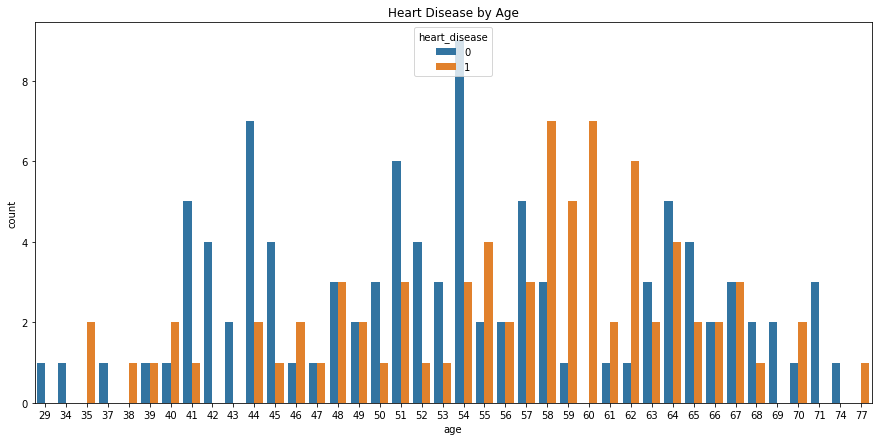

In [20]:
# Plot distribution of Age
# It is clear that older people have more risk getting heart disease (which is expected)
plt.figure(figsize=(15,7))
sns.countplot(x = 'age', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Age")
plt.show()

In [21]:
minAge = min(train_data.age)
maxAge = max(train_data.age)
print('Min Age :', minAge)
print('Max Age :', maxAge)

Min Age : 29
Max Age : 77


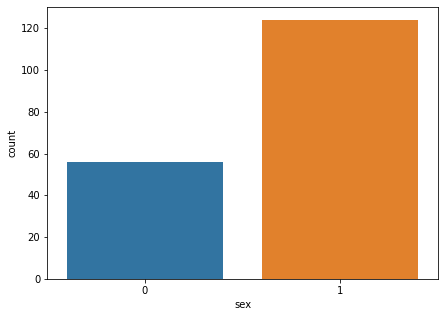

In [22]:
# Plot distribution of sex column
# It is clear that the ratio of Male:Female is approx 2:1.
plt.figure(figsize=(7,5))
sns.countplot(train_data['sex'])
plt.show()

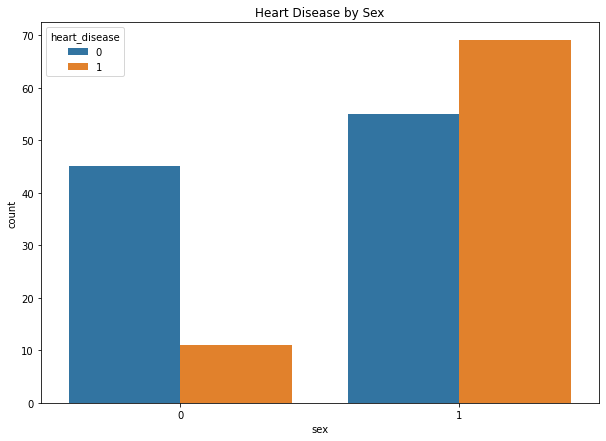

In [23]:
# Plot distribution of sex column with huse on heart_disease
plt.figure(figsize=(10,7))
sns.countplot(x = 'sex', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Sex")
plt.show()

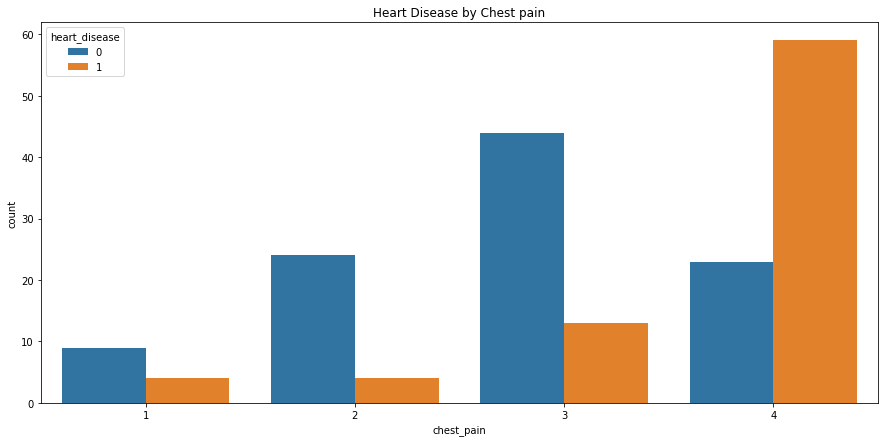

In [24]:
# Plot distribution of chest_pain_type
# It is clear that people having severe chest pain are likely to have heart disease
plt.figure(figsize=(15,7))
sns.countplot(x = 'chest_pain', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Chest pain")
plt.show()

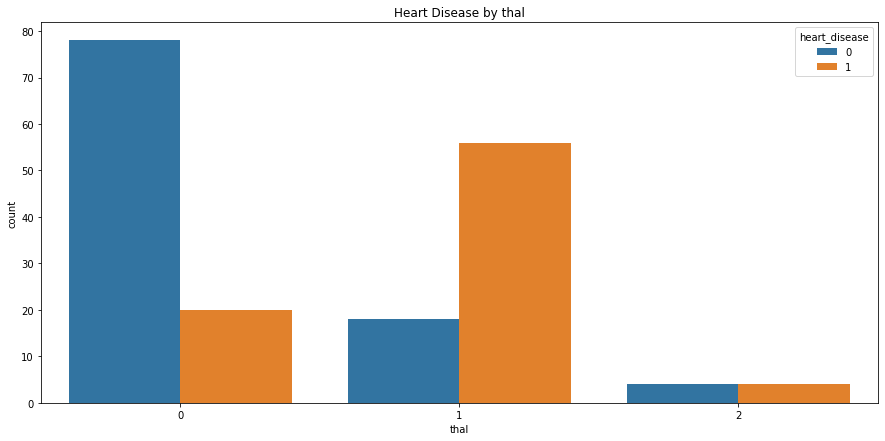

In [25]:
# Plot distribution of thal
plt.figure(figsize=(15,7))
sns.countplot(x = 'thal', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by thal")
plt.show()

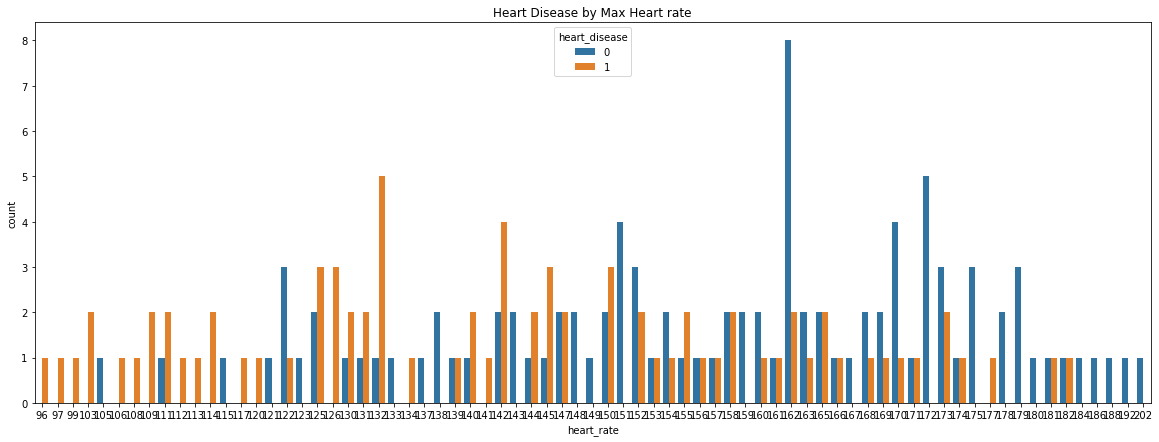

In [26]:
# Plot distribution of max_heart_rate_achieved
plt.figure(figsize=(20,7))
sns.countplot(x = 'heart_rate', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Max Heart rate")
plt.show()

In [27]:
minHeartRate = min(train_data.heart_rate)
maxHeartRate = max(train_data.heart_rate)
print('Min Heart rate :', minHeartRate)
print('Max Heart rate :', maxHeartRate)

Min Heart rate : 96
Max Heart rate : 202


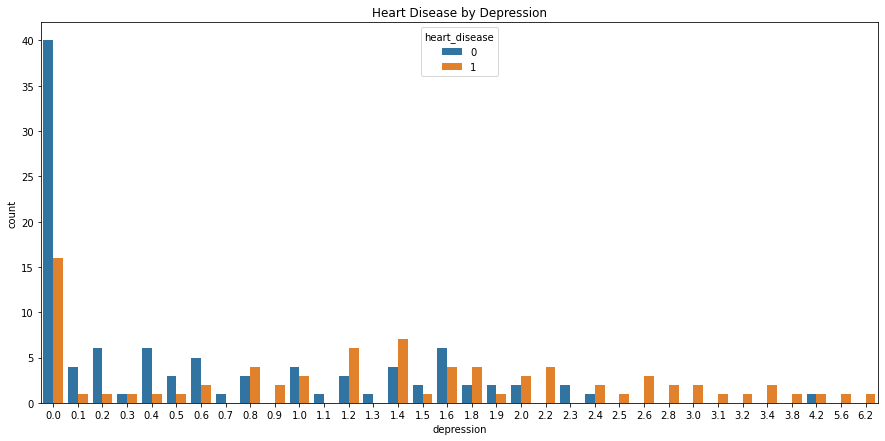

In [28]:
# Plot distribution of oldpeak_eq_st_depression
plt.figure(figsize=(15,7))
sns.countplot(x = 'depression', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Depression")
plt.show()

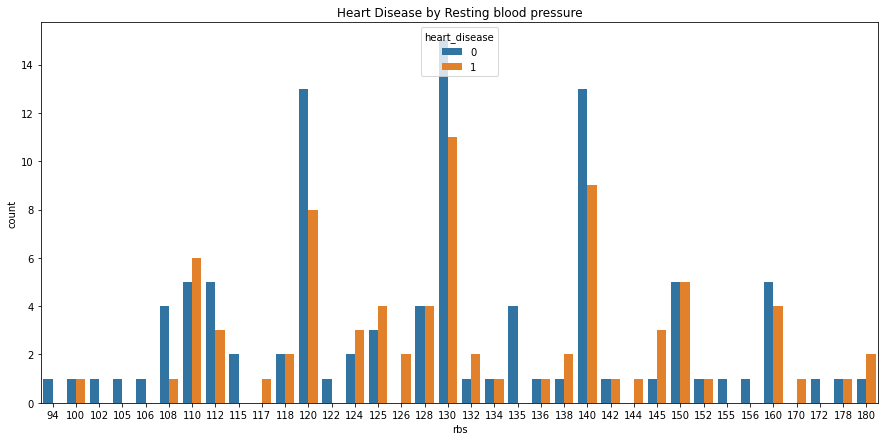

In [29]:
# Plot distribution of resting_blood_pressure
plt.figure(figsize=(15,7))
sns.countplot(x = 'rbs', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Resting blood pressure")
plt.show()

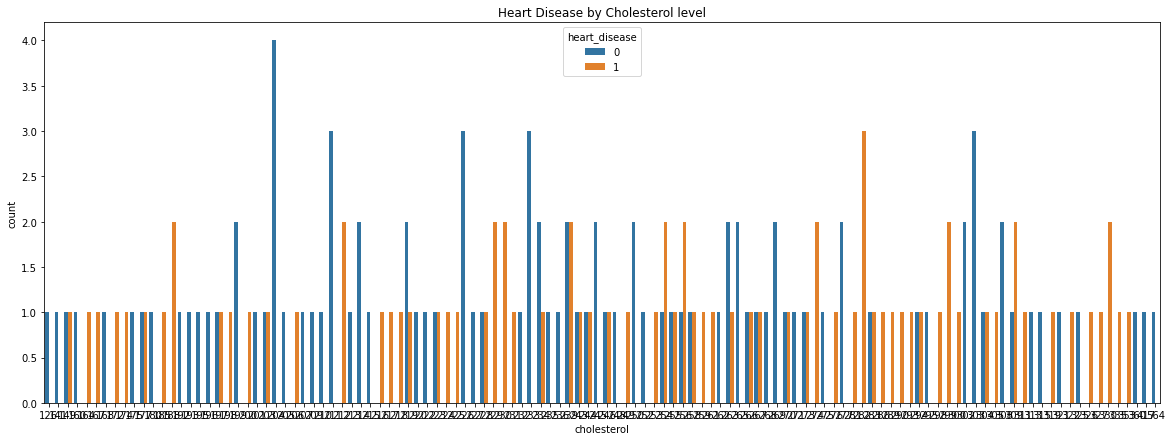

In [30]:
# Plot distribution of serum_cholesterol_mg_per_dl
plt.figure(figsize=(20,7))
sns.countplot(x = 'cholesterol', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Cholesterol level")
plt.show()

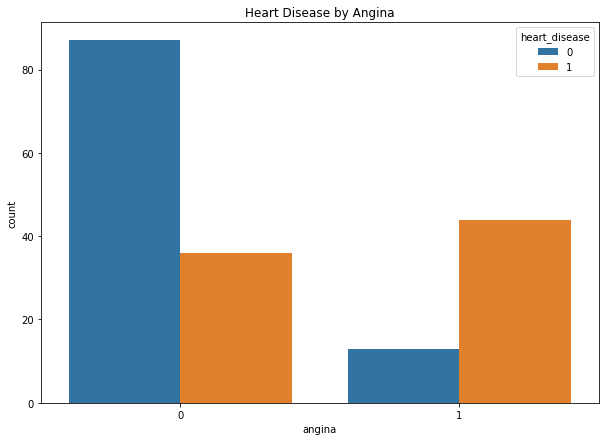

In [31]:
# Plot distribution of exercise_induced_angina
plt.figure(figsize=(10,7))
sns.countplot(x = 'angina', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Angina")
plt.show()

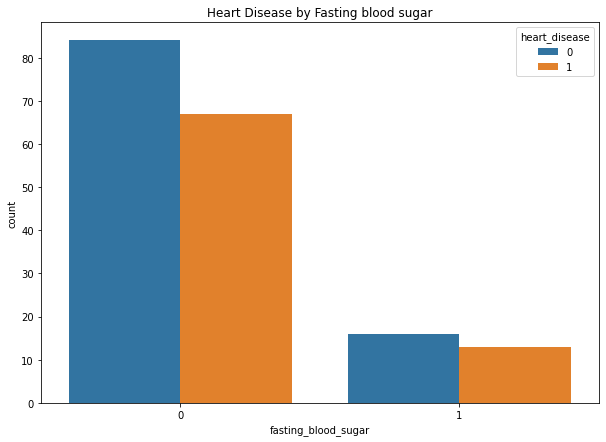

In [32]:
# Plot distribution of fasting_blood_sugar_gt_120_mg_per_dl
plt.figure(figsize=(10,7))
sns.countplot(x = 'fasting_blood_sugar', hue = 'heart_disease', data = train_data)
plt.title("Heart Disease by Fasting blood sugar")
plt.show()

0    100
1     80
Name: heart_disease, dtype: int64


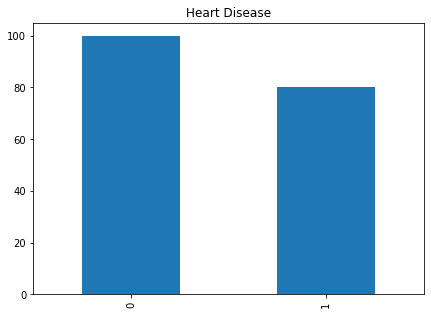

In [33]:
# Let’s check how well our outcome column is balanced
print(train_data['heart_disease'].value_counts())

plt.figure(figsize=(7,5))
train_data['heart_disease'].value_counts().plot(kind="bar")
plt.title("Heart Disease")
plt.show()

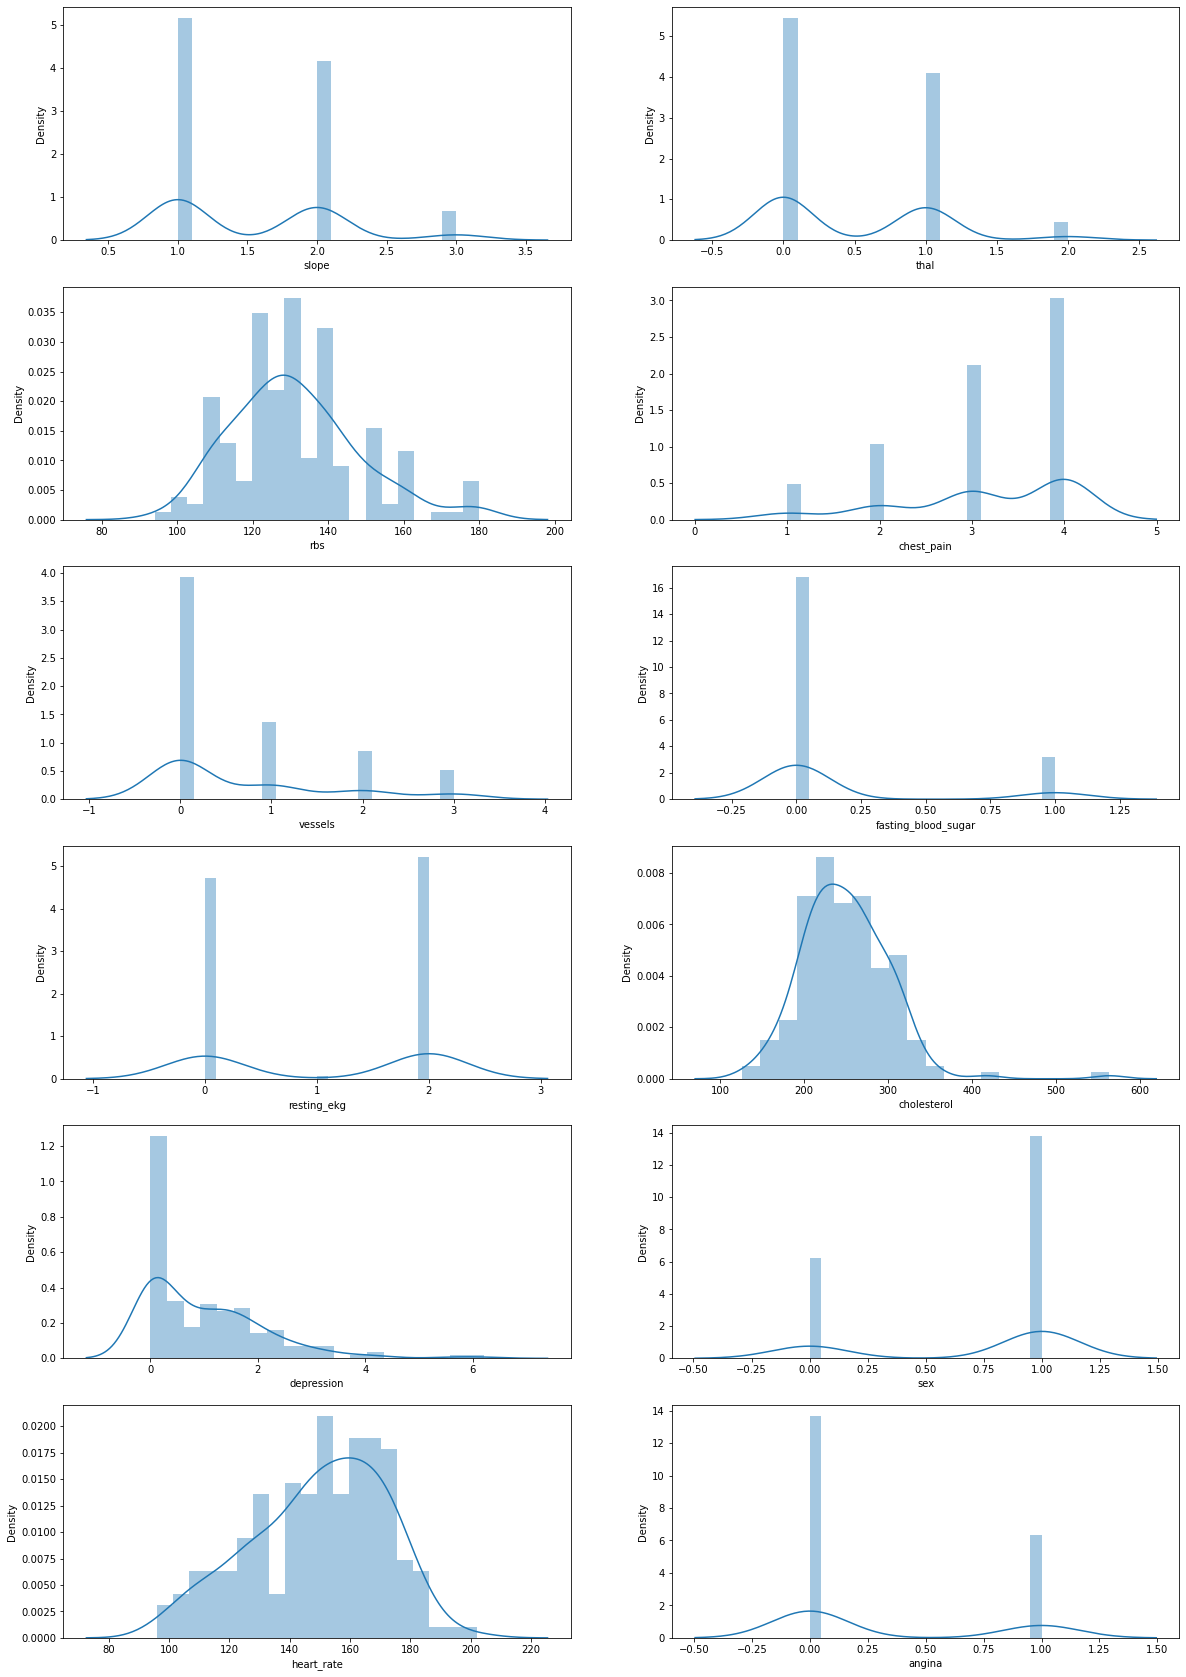

In [34]:
# Density graphs of all the attributes
fig, ax = plt.subplots(6,2, figsize=(20,30))

sns.distplot(train_data.slope, bins = 20, ax=ax[0,0]) 
sns.distplot(train_data.thal, bins = 20, ax=ax[0,1]) 
sns.distplot(train_data.rbs, bins = 20, ax=ax[1,0]) 
sns.distplot(train_data.chest_pain, bins = 20, ax=ax[1,1]) 
sns.distplot(train_data.vessels, bins = 20, ax=ax[2,0])
sns.distplot(train_data.fasting_blood_sugar, bins = 20, ax=ax[2,1])
sns.distplot(train_data.resting_ekg, bins = 20, ax=ax[3,0]) 
sns.distplot(train_data.cholesterol, bins = 20, ax=ax[3,1]) 
sns.distplot(train_data.depression, bins = 20, ax=ax[4,0]) 
sns.distplot(train_data.sex, bins = 20, ax=ax[4,1]) 
sns.distplot(train_data.heart_rate, bins = 20, ax=ax[5,0]) 
sns.distplot(train_data.angina, bins = 20, ax=ax[5,1])
plt.show()

In [35]:
# Check Skewness
from scipy.stats import skew
# Skewness is the measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 
# Skewness value between -0.5 to +0.5 is good, but anything between -1 and +1 is acceptable too.

print("Slope: ", skew(train_data['slope']))
print("Thal: ", skew(train_data['thal']))
print("Resting Blood Pressure: ", skew(train_data['rbs']))
print("Chest pain: ", skew(train_data['chest_pain']))
print("Major vessels: ", skew(train_data['vessels']))
print("Fasting Blood sugar: ", skew(train_data['fasting_blood_sugar']))
print("Resting ekg: ", skew(train_data['resting_ekg']))
print("Cholesterol: ", skew(train_data['cholesterol']))
print("Depression: ", skew(train_data['depression']))
print("Sex: ", skew(train_data['sex']))
print("Age: ", skew(train_data['age']))
print("Max Heart rate: ", skew(train_data['heart_rate']))
print("Angina: ", skew(train_data['angina']))

Slope:  0.660585714798187
Thal:  0.6758537716491559
Resting Blood Pressure:  0.6515915088698496
Chest pain:  -0.8421645409638178
Major vessels:  1.1582430715853718
Fasting Blood sugar:  1.8436240212843253
Resting ekg:  -0.10012405930078504
Cholesterol:  1.2632907841049
Depression:  1.4948214849547024
Sex:  -0.8160261132534429
Age:  -0.19750200100335744
Max Heart rate:  -0.3904163075399945
Angina:  0.7882318002900207


### Correlation Matrix

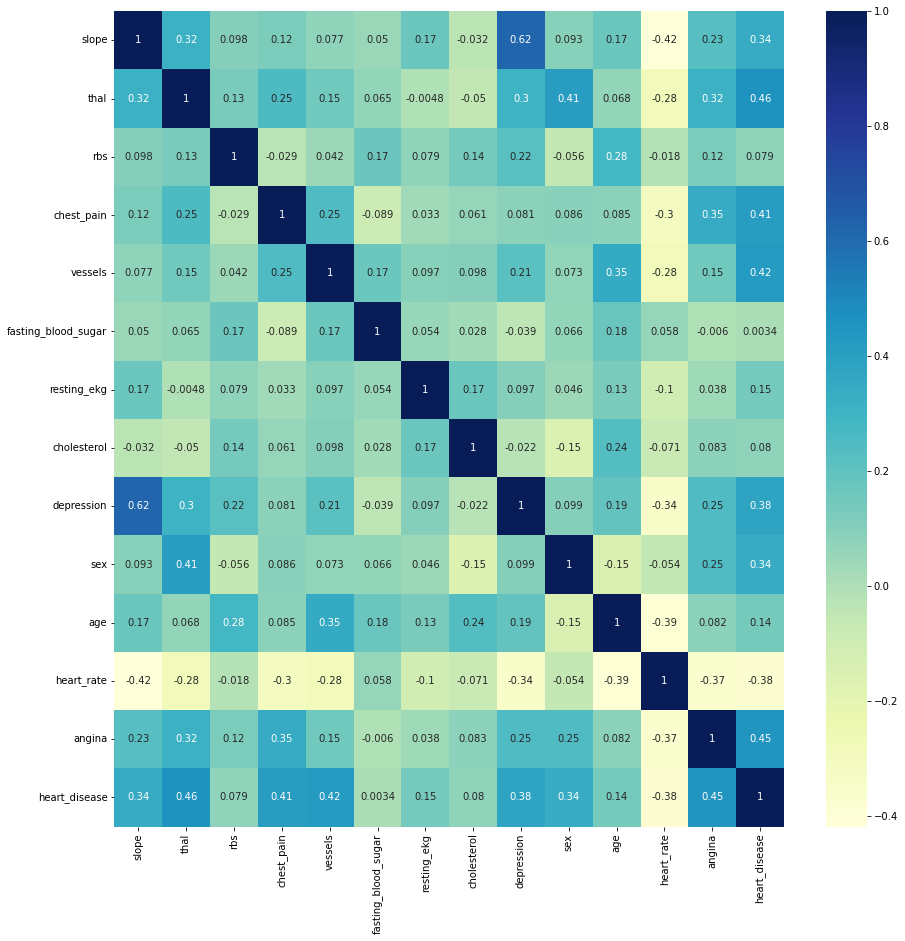

In [36]:
corr_matrix = train_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap = "YlGnBu")
plt.show()

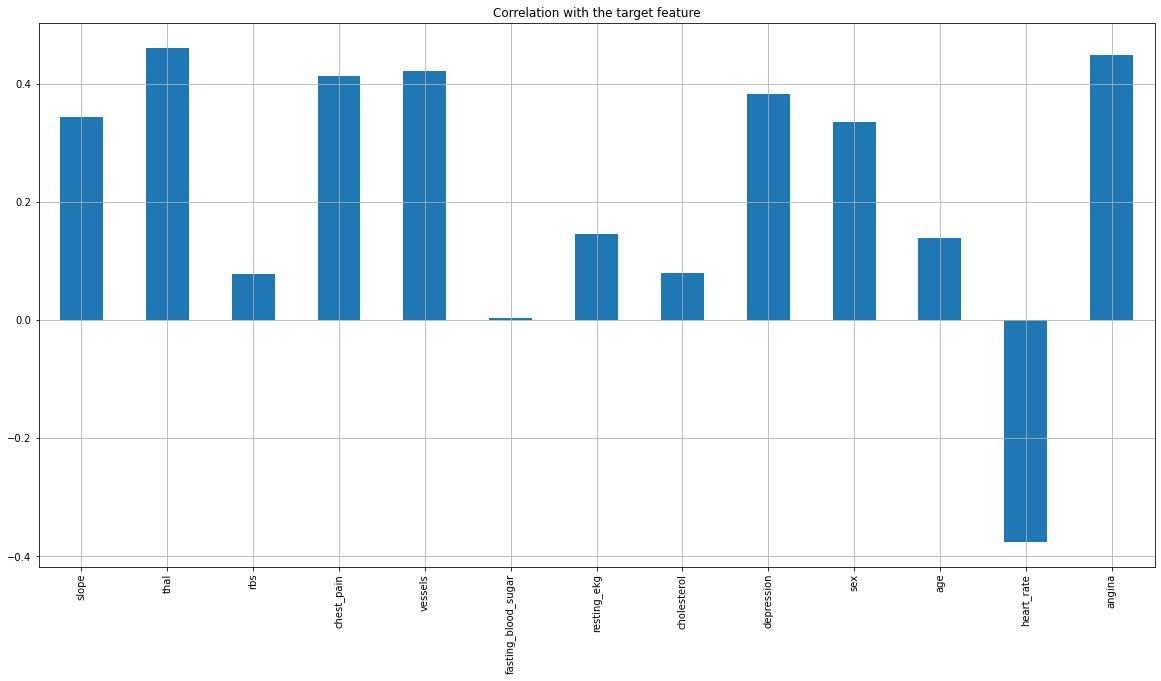

In [37]:
train_data.drop('heart_disease', axis=1).corrwith(train_data.heart_disease).plot(kind='bar', grid=True, figsize=(20, 10),
                                                                                 title="Correlation with the target feature")
plt.show()

In [38]:
# Only 1 feature 'heart_rate' is negatively correlated with the target feature
# 'fasting_blood_sugar' is the least correlated with the target variable.

### Data Processing

In [39]:
# Get the list of categorical values
print("Categorical features: ") 
categorical_val

Categorical features: 


['slope',
 'thal',
 'chest_pain',
 'vessels',
 'fasting_blood_sugar',
 'resting_ekg',
 'sex',
 'angina',
 'heart_disease']

In [40]:
columns = ['slope', 'thal', 'rbs', 'chest_pain', 'vessels', 'fasting_blood_sugar',
           'resting_ekg', 'cholesterol', 'depression', 'sex', 'age', 'heart_rate', 'angina', 'heart_disease']
uniqueVal = []

for col in columns:
    if col in categorical_val:
        print(col,':', train_data[col].nunique())
        uniqueVal.append(train_data[col].nunique())

print('Total Unique values from categorical data: ', sum(uniqueVal))

slope : 3
thal : 3
chest_pain : 4
vessels : 4
fasting_blood_sugar : 2
resting_ekg : 3
sex : 2
angina : 2
heart_disease : 2
Total Unique values from categorical data:  25


#### One Hot Encoding

In [41]:
# One Hot encode the categorical columns
categorical_val.remove('heart_disease')
data = pd.get_dummies(train_data, columns = categorical_val)

print(data.shape)
data.head(5)

(180, 29)


,rbs,cholesterol,depression,age,heart_rate,heart_disease,slope_1,slope_2,slope_3,thal_0,...,vessels_3,fasting_blood_sugar_0,fasting_blood_sugar_1,resting_ekg_0,resting_ekg_1,resting_ekg_2,sex_0,sex_1,angina_0,angina_1
0,128,308,0.0,45,170,0,1,0,0,1,...,0,1,0,0,0,1,0,1,1,0
1,110,214,1.6,54,158,0,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
2,125,304,0.0,77,162,1,1,0,0,1,...,1,1,0,0,0,1,0,1,0,1
3,152,223,0.0,40,181,1,1,0,0,0,...,0,1,0,1,0,0,0,1,1,0
4,178,270,4.2,59,145,0,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0


### Building our model

In [42]:
# Define the 'features' and 'labels'
X = data.drop('heart_disease', axis='columns')
y = data['heart_disease']

In [43]:
# Define train : test dataset in 70 : 30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [44]:
# Scale down i/p features for better results
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### ANN Model

In [45]:
classifier = models.Sequential()

classifier.add(layers.Dense(128, activation = 'relu', input_dim = 28))
classifier.add(layers.Dropout(0.5))

classifier.add(layers.Dense(128, activation = 'relu'))
classifier.add(layers.Dropout(0.6))

classifier.add(layers.Dense(128, activation = 'relu'))
classifier.add(layers.Dropout(0.5))

classifier.add(layers.Dense(1,  activation = 'sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [46]:
# Compile the ANN Model
classifier.compile(optimizer = 'RMSProp', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Fitting the Model

In [47]:
# Training our model on the train set
history = classifier.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=20)
history

Train on 153 samples, validate on 27 samples
Epoch 1/20
153/153 [==============================] - 0s 1ms/sample - loss: 0.6708 - acc: 0.5752 - val_loss: 0.6177 - val_acc: 0.7407
Epoch 2/20
153/153 [==============================] - 0s 79us/sample - loss: 0.6480 - acc: 0.6275 - val_loss: 0.5584 - val_acc: 0.7407
Epoch 3/20
153/153 [==============================] - 0s 72us/sample - loss: 0.6180 - acc: 0.6863 - val_loss: 0.4932 - val_acc: 0.8519
Epoch 4/20
153/153 [==============================] - 0s 78us/sample - loss: 0.6056 - acc: 0.6667 - val_loss: 0.4676 - val_acc: 0.8148
Epoch 5/20
153/153 [==============================] - 0s 72us/sample - loss: 0.6064 - acc: 0.6732 - val_loss: 0.4607 - val_acc: 0.8148
Epoch 6/20
153/153 [==============================] - 0s 78us/sample - loss: 0.5499 - acc: 0.7582 - val_loss: 0.4238 - val_acc: 0.8148
Epoch 7/20
153/153 [==============================] - 0s 65us/sample - loss: 0.5818 - acc: 0.7059 - val_loss: 0.4089 - val_acc: 0.8148
Epoch 8/20


In [48]:
# Make predictions on the testing set
y_pred = classifier.predict(X_test)

### Evaluating our Model

In [49]:
from sklearn.metrics import log_loss

clf_probs=classifier.predict_proba(X_test)
score=log_loss(y_test,clf_probs)
print(score)

0.3438562364877995


In [50]:
classifier.evaluate(X_test, y_test)

27/27 [==============================] - 0s 37us/sample - loss: 0.3439 - acc: 0.8889


[0.34385624527931213, 0.8888889]

In [51]:
test_loss, test_acc = classifier.evaluate(X_test, y_test)
print('Accuracy(in %):', test_acc*100)

27/27 [==============================] - 0s 37us/sample - loss: 0.3439 - acc: 0.8889
Accuracy(in %): 88.88888955116272


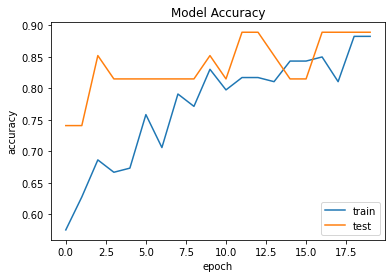

In [52]:
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

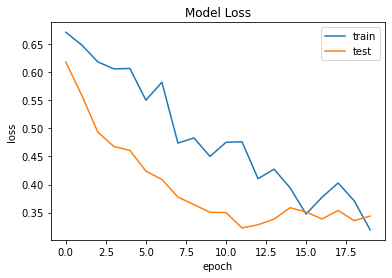

In [53]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

### Making predictions

In [54]:
pred = classifier.predict_proba(X_test)

In [55]:
pred1 = classifier.predict_classes

In [56]:
df1 = pd.DataFrame(pred, columns=['0'])
df1.head(10)

,0
0,0.390072
1,0.974718
2,0.028885
3,0.049053
4,0.979965
5,0.182810
6,0.979358
7,0.263817
8,0.995565
9,0.381261


In [57]:
df2 = pd.DataFrame(pred, columns=['1'])
df2.head(10)

,1
0,0.390072
1,0.974718
2,0.028885
3,0.049053
4,0.979965
5,0.182810
6,0.979358
7,0.263817
8,0.995565
9,0.381261


In [58]:
X = test_data.iloc[:,0:1]

In [59]:
X["heart_disease_present"] = df2

In [60]:
X.head(10)

,patient_id,heart_disease_present
0,olalu7,0.390072
1,z9n6mx,0.974718
2,5k4413,0.028885
3,mrg7q5,0.049053
4,uki4do,0.979965
5,kev1sk,0.182810
6,9n6let,0.979358
7,jxmtyg,0.263817
8,51s2ff,0.995565
9,wi9mcs,0.381261


In [61]:
export_csv=X.to_csv(r'C:\Users\Rajashri\Desktop\Resume\Resume Projects\Heart disease prediction\ANN prediction.csv', 
                      index=None, header=True)
print("Successfully Exported!!")

Successfully Exported!!
